<a href="https://colab.research.google.com/github/rajanpbg/Demo_labs/blob/deeplearning/tensor/10_BASIC_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Looking At Fashion Mnist Dataset  For CNN demo 


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import TensorBoard
## lets add tensorboard
%mkdir logs
import os
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir=logdir, histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         write_images=True)

mkdir: cannot create directory ‘logs’: File exists


In [37]:
from  keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


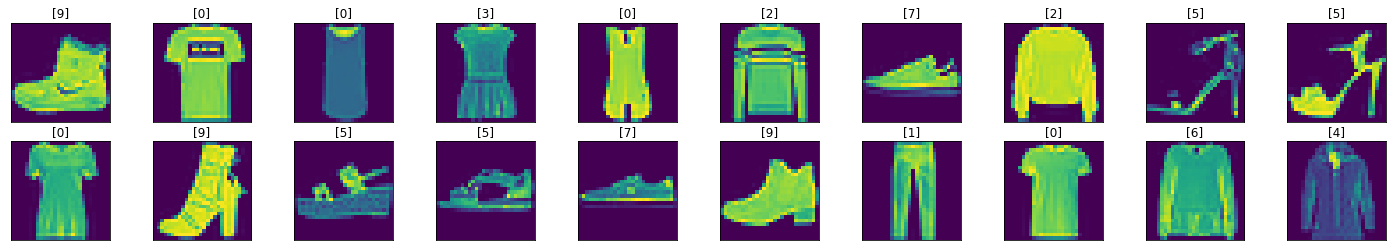

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(train_images[idx])
  ax.set_title([train_labels[idx].item()])


In [40]:
print(set(train_labels))
print(len(set(train_labels)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


In [41]:
train_images, test_images = train_images.reshape(-1, 28, 28, 1) / 255.0, test_images.reshape(-1, 28, 28, 1) / 255.0

print(train_images.shape)

(60000, 28, 28, 1)


In [42]:
# the model will be a sequence of layers
model = Sequential()

# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 11, 11, 64)       

In [45]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Train the model
r = model.fit(train_images, train_labels, validation_split=0.25, epochs=15, batch_size=32,callbacks=[tbCallBack])

Epoch 1/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.4920 - accuracy: 0.8221 - val_loss: 0.4191 - val_accuracy: 0.8439
Epoch 2/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3500 - accuracy: 0.8733 - val_loss: 0.3994 - val_accuracy: 0.8493
Epoch 3/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3006 - accuracy: 0.8897 - val_loss: 0.4123 - val_accuracy: 0.8423
Epoch 4/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2688 - accuracy: 0.9013 - val_loss: 0.3573 - val_accuracy: 0.8705
Epoch 5/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2435 - accuracy: 0.9072 - val_loss: 0.3048 - val_accuracy: 0.8913
Epoch 6/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2162 - accuracy: 0.9192 - val_loss: 0.3558 - val_accuracy: 0.8825
Epoch 7/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1956 - accuracy: 0.9261 - val_loss: 0.3670 - val_ac

In [47]:
# Evaluate the model
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.8779
[0.4675809442996979, 0.8779000043869019]


Confusion matrix, without normalization
[[831   2  15  10   2   3 132   0   5   0]
 [  2 976   2  11   2   0   6   0   1   0]
 [ 17   0 794   9  46   0 133   0   1   0]
 [ 32  11  19 845  30   1  59   0   1   2]
 [  4   0  52  19 701   0 221   0   3   0]
 [  0   0   0   1   0 977   0  15   0   7]
 [109   0  42  16  20   0 810   0   3   0]
 [  0   0   0   0   0  28   0 957   0  15]
 [  9   0   0   2   0   8  27   2 952   0]
 [  0   0   0   0   0  11   0  52   1 936]]


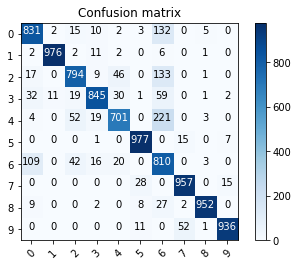

In [48]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))

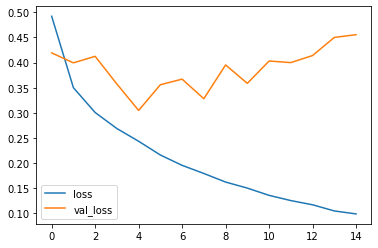

In [49]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

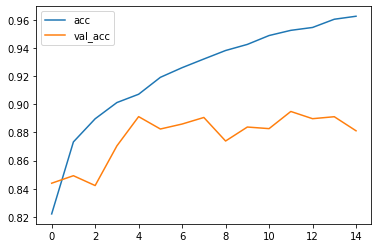

In [50]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [55]:
## lets make some test predictions 
model.predict(test_images[0].reshape(-1, 28, 28, 1)).argmax(axis=1)


array([9])

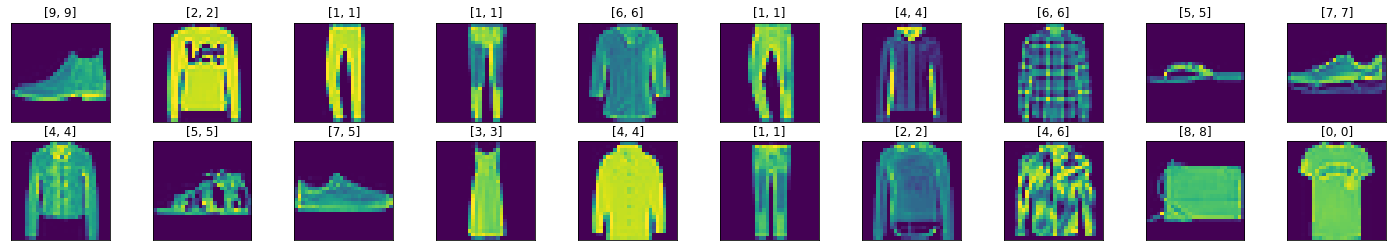

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(test_images[idx].reshape(28,28))
  predict = model.predict(test_images[idx].reshape(-1, 28, 28, 1)).argmax(axis=1)
  ax.set_title([test_labels[idx].item(),predict[0] ])
